(-2168070.5583405863, 612198.4700071239, 2452966.8572816364, 3795693.1290645674)


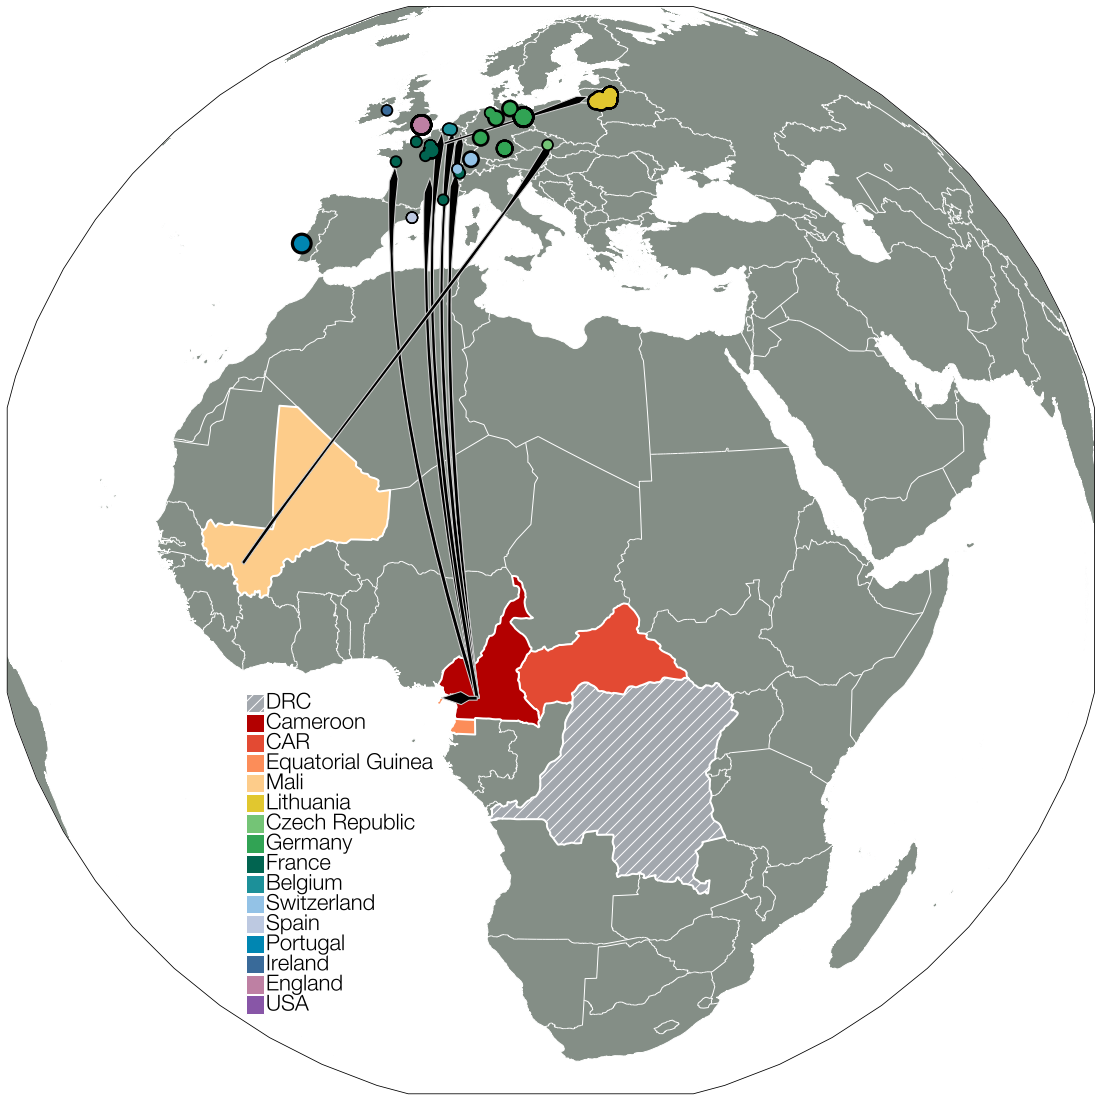

In [2]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.collections import LineCollection
from matplotlib.patches import Rectangle,Polygon
from matplotlib.gridspec import GridSpec

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42

import os,glob
import numpy as np
# from Bio import SeqIO
# from collections import Counter

# import baltic as bt

import cartopy
import cartopy.crs as ccrs


def desaturate(rgb,sat,lum=None):
    if isinstance(rgb,str):
        rgb=mpl.colors.hex2color(rgb) ## convert to rgb if string given
    elif np.array(rgb).shape[-1]==4: ## if there's four values
        rgb=rgb[:-1]
    elif isinstance(rgb,unicode):
        rgb=mpl.colors.hex2color(rgb) ## convert to rgb if string given

    assert 0.0<=sat<=1.0,'Desaturation outside allowed interval'
    assert np.array(rgb).shape[-1]==3,'Incorrect colour array shape'
    hsv=mpl.colors.rgb_to_hsv(rgb) ## convert rgb vector to hue, saturation, value
    hsv[1]=sat ## use provided saturation
    if lum:
        hsv[2]=lum ## use provided luminosity
    
    return mpl.colors.hsv_to_rgb(hsv) ## convert back to rgb


fig = plt.subplots(figsize=(20,20),facecolor='w')

class RP(ccrs.NearsidePerspective):
    @property
    def threshold(self):
        return 1e3

# proj=ccrs.Geostationary(central_longitude=17,satellite_height=14000000)
# proj=ccrs.Geostationary(central_longitude=17,satellite_height=14000000)
proj=ccrs.NearsidePerspective(central_longitude=17, central_latitude=15, satellite_height=14000000, false_easting=0, false_northing=0, globe=None)

gs = GridSpec(1,1,hspace=0.01,wspace=0.0)
# ax=plt.subplot(gs[0],projection=proj)
ax=plt.subplot(gs[0],projection=RP(central_longitude=17, central_latitude=15, satellite_height=14000000))


colours={}
for line in open('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/colours.csv','r'):
    loc,colour=line.strip('\n').split('\t')
    colours[loc]=colour

loc_size={'town': 1, 'county': 2, 'country': 3}
coordinates={'Liège': (50.63373,5.56749,'town'), 
             'England': (51.509865,-0.118092,'country'), 
             'Rhineland-Palatinate': (49.992863,8.247253,'county'), 
             'Geneva': (46.204391,6.143158,'county'), 
             'Sint-Joost-ten-Node': (50.85,4.383333,'town'), 
             'Vilniaus_apskritis': (54.68916,25.2798,'county'), 
             'Lower_Saxony': (52.373920,9.735603,'county'), 
             'Bavaria': (48.777500,11.431111,'county'), 
             'La_Roche-sur-Yon': (46.670502,-1.426000,'town'), 
             'Issoire': (45.55,3.25,'town'), 
             'Alytus': (54.4000,24.0500,'county'),
             'Maryland': (39.045753,-76.641273,'country'), 
             'Pontoise': (49.051601,2.101700,'town'), 
             'Taurages': (55.25222, 22.28972,'county'), 
             'Utenos': (55.5,25.6,'county'), 
             'Kaunas': (54.90272,23.90961,'county'), 
             'Marijampole': (54.56667, 23.35,'county'), 
             'Utenos_apskritis': (55.5,25.6,'county'), 
             'Vilassar_De_Mar': (41.50408,2.39226,'town'), 
             'Utena': (55.5,25.6,'county'), 
             'Germany': (52.531677,13.381777,'country'), 
             'Vilnius': (54.68916,25.2798,'county'), 
             'Asse': (50.91011,4.19836,'town'), 
             'West_Virginia': (32.784618,-79.940918,'country'), 
             'Cluses': (46.060390,6.580582,'town'), 
             'CAR': (6.6194,20.9367,'country'), 
             'Hauts-de-France': (50.629250,3.057256,'county'), 
#              'Equatorial Guinea': (1.6195,10.3178,'country'), 
#              'Central African Republic': (16.346400, 3.436900,'town'), ## park coordinates
             'Olomouc_Region': (49.593778,17.250879,'county'), 
             'Le_Havre': (49.490002,0.100000,'town'), 
             'Lochristi': (51.097461,3.837824,'town'), 
             'Buggenhout': (51.0159,4.20173,'town'), 
             'Mali': (12.635898,-7.971547,'country'), 
             'Cameroon': (3.844119, 11.501346,'country'), 
             'Equatorial_Guinea': (3.75578,8.78166,'country'),
             'Neder-Over-Heembeek': (50.9057, 4.3922,'town'), 
             'France': (48.864716,2.349014,'country'), 
             'Vilassar De Dalt': (41.517, 2.367,'town'), 
             'Dublin': (53.350140,-6.266155,'town'), 
             'Ile-de-France': (48.5000,2.5000,'county'), 
             'Basel-Landschaft': (47.559601,7.588576,'county'), 
             'Marseille': (43.296398,5.370000,'town'), 
             'Brno': (49.19522,16.60796, 'town'), 
             'Portugal': (38.736946,-9.142685,'country'), 
             'Orleans': (47.90289,1.90389,'town'), 
             'Vaud': (46.478176,6.238849,'town'), 
             'Merelbeke': (50.994550,3.745640,'town'), 
             'Bremen': (53.07516,8.80777,'town'), 
             'Nantes': (47.218102,-1.552800,'town'), 
             'Mecklenburg-Western_Pomerania': (53.629593,11.414763,'county')}

travel={}
locs={}
for line in open('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/travel_qc_info.csv','r'):
    l=line.strip('\n').split('\t')
#     print(l[3])
    if l[0]!='Virus name':
        locs[l[0].replace(' ','_')]=[c.strip(' ').replace(' ','_') for c in l[3].split('/')][-1]
        if l[4]!='':
            travel[l[0]]=l[4]
#         print(locs[l[0]])
#         print(locs[l[0]][-1],len(locs[l[0]]),locs[l[0]][-1] in coordinates)

locs['hCoV-19/Belgium/Aalst-OLVZ-8042639/2021']='Asse'
locs['hCoV-19/Belgium/UGent-4359/2021']='Lochristi'
locs['hCoV-19/Belgium/UGent-4369/2021']='Buggenhout'

locs['hCoV-19/Belgium/UGent-4966/2021']='Merelbeke'
locs['hCoV-19/Belgium/UGent-5440/2021']='Merelbeke'

############
for strain in locs:
    if strain not in travel and 'USA' not in strain and locs[strain] in coordinates:
        
#         arrival=arrival.replace('_',' ')
#         print('adding local case marker for %s in %s'%(strain,locs[strain]))
        lat,lon,size=coordinates[locs[strain]]
#         print(locs[strain],lat,lon)
        s=80
#         print(size,s)
        size=loc_size[size]
        ax.scatter(lon,lat,s=s*size,facecolor=colours[strain.split('/')[1].replace('_',' ')],edgecolor='none',lw=2, transform=ccrs.PlateCarree(),zorder=110000)
        ax.scatter(lon,lat,s=s*2*size,facecolor='k',edgecolor='none',lw=2, transform=ccrs.PlateCarree(),zorder=100000)
#         ax.text(lon,lat,locs[strain],zorder=100000000, transform=ccrs.PlateCarree())

# print(travel)
#############

scale='10m'
# water='#CED6D9'
water='w'
land='#848E86'

ax.add_feature(cartopy.feature.LAKES.with_scale(scale),facecolor=water)
ax.add_feature(cartopy.feature.OCEAN.with_scale(scale),facecolor=water,edgecolor=water)
ax.add_feature(cartopy.feature.LAND.with_scale(scale),facecolor=land,edgecolor='w',zorder=1)
ax.add_feature(cartopy.feature.BORDERS.with_scale(scale),edgecolor='w',lw=1,zorder=2)
# ax.gridlines(color='k',linestyle='--',alpha=0.2)

############
import cartopy.io.shapereader as shpreader
shpfilename = shpreader.natural_earth(resolution='50m', category='cultural', name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
# values = list(df[title].unique())

print(ax.get_extent())

###########
s=100
# ax.scatter(16.346400, 3.436900,s=s,facecolor=colours['CAR'],edgecolor='none', transform=ccrs.PlateCarree(),zorder=110000)
# ax.scatter(16.346400, 3.436900,s=s*2,facecolor='k',edgecolor='none', transform=ccrs.PlateCarree(),zorder=100000)

for country in countries:
#     print(country)
    if country.attributes['ADMIN'] in ['Cameroon','Mali','Central African Republic','Equatorial Guinea','Democratic Republic of the Congo']:
#     if country.attributes['ADMIN'] in ['Cameroon','Mali']:
        name=country.attributes['ADMIN']
        if name=='Central African Republic': name='CAR'
        fc=colours[name]
        hatch=''
#         print(name)
        if name=='Democratic Republic of the Congo':
            hatch='//'
#             print(hatch)
        
        ax.add_geometries([country.geometry], ccrs.PlateCarree(),
                          facecolor=fc,
#                           label=country.attributes[attribute],
                          edgecolor='w', hatch=hatch, linewidth=2,zorder=1000)
###########

###########
done=[]
for strain in travel:
#     print(strain,travel[strain],locs[strain])
    fromLoc,toLoc=travel[strain],locs[strain]
    
    fromLon,fromLat,_=coordinates[fromLoc]
    toLon,toLat,_=coordinates[toLoc]
    
#     if travel[case] not in done:
#         done.append(travel[case])
#         ax.plot([fromLat, toLat],[fromLon, toLon],color='k',ls='-',zorder=10000,transform=ccrs.PlateCarree())
    
#     print(fromLoc,toLoc)
    oh=-5 if toLoc!='Equatorial_Guinea' else -0.4
    ax.arrow(fromLat,fromLon,toLat-fromLat,toLon-fromLon,width=0.3,transform=ccrs.PlateCarree(),overhang=oh,head_width=1,length_includes_head=True,facecolor='k',edgecolor='lightgrey',zorder=11000)
#         ax.arrow(fromLat,fromLon,toLat-fromLat,toLon-fromLon,width=0.6,transform=ccrs.PlateCarree(),overhang=-5,head_width=1.5,length_includes_head=True,facecolor='w',edgecolor='none',zorder=10000)
###########

h=150000
w=150000

for c,country in enumerate(['USA', 'England', 'Ireland', 'Portugal', 'Spain', 'Switzerland', 'Belgium', 'France', 'Germany', 'Czech Republic', 'Lithuania', 'Mali', 'Equatorial Guinea', 'CAR', 'Cameroon', 'Democratic Republic of the Congo']):
    x=-2500000
    y=-3800000+c*h*1.1
    fc=colours[country]
#     fc=desaturate(fc,0.6)
    effects=[path_effects.Stroke(linewidth=4, foreground='white'),
             path_effects.Stroke(linewidth=0, foreground='k')] ## black text, white outline
    
    country='DRC' if country=='Democratic Republic of the Congo' else country
    hatch=''
    if country=='DRC':
        hatch='//'
    ax.add_patch(Rectangle((x,y),w,h,facecolor=fc,edgecolor='w',hatch=hatch,clip_on=False,zorder=10000000))
    ax.text(x+w*1.1,y+h/2,country,color='k',va='center',path_effects=effects,zorder=10000000)
#########

ax.set_xlim(-4456742.500225266, 4456742.500225266)
ax.set_ylim(-4456742.500225266, 4456742.500225266)

plt.savefig('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/figures/SuppFig6_Africa_distribution.png',dpi=100,bbox_inches='tight')
plt.show()